In [1]:
import pandas as pd
import numpy as np
import sys
from PIL import Image
import matplotlib.pyplot as plt

# progressInstalled = False
# try:
#     from progress.bar import ChargingBar
# except:
#     progressInstalled = False

sets = set(['a','b','c','d','e'])

def loadData(src,datasets= ['a','b','c','d','e'] , size=180, mode='RGB', rng=0):
    m = {'RGB': 3, 'L': 1, '1': 1}
    inputs = []
    outputs = []
    datasets = [i for i in datasets if i in sets]
    if datasets == []:
        datasets = ['a','b','c','d','e']
    for dataset in datasets:
        labels = pd.read_csv(src + "/training-{0}.csv".format(dataset))
        if rng == 0:
            labels = labels[['filename', 'digit']]
        else:
            labels = labels[['filename', 'digit']][rng[0]:rng[1]]
        Y = np.array(labels['digit'],dtype=np.uint8)
        length = len(labels)
        X = np.zeros((length, size, size, m[mode]))
        num = 0
        # if progressInstalled:
        #     bar = ChargingBar('Loading Training Set {0}'.format(dataset),max = len(labels),
        #                       suffix='%(index)d/%(max)d - %(percent).1f%% - %(eta)ds')
        for i in labels['filename']:
            img = Image.open(src + "/training-{0}/".format(dataset) + i)
            c = img.resize((size, size))
            c = np.array(c.convert(mode), dtype=np.uint8).reshape((size,size,m[mode]))
            X[num, :, :, :] = c
            num = num + 1
            # if progressInstalled and (not num % max(1,(length / 200))):
            #     bar.index = num
            #     bar.update()
            # else:
            #     if (not num % (length / 20)):
            #         print("Loaded Training Set {0}:. ".format(dataset) + str(num) + "/" + str(length))
            if (not num % (length / 20)):
                print("Loaded Training Set {0}:. ".format(dataset) + str(num) + "/" + str(length))
        # if progressInstalled:
        #     bar.finish()
        inputs.append(X)
        outputs.append(Y)

    X = np.concatenate(inputs,axis = 0)
    Y = np.concatenate(outputs,axis = 0)
    return (X, Y)


def show_digit(x,label):
    plt.axis('off')
    l = x.shape[1]
    m = x.shape[2]
    if m == 1:
        plt.imshow(x.reshape((l,l)), cmap=plt.cm.gray)
    else:
        plt.imshow(x.reshape((l, l, m)))
    #plt.title(label)
    plt.show()
    return


def vis_image(index, X, Y):
    label = Y[index]
    show_digit(X[index, :, :, :],label)
    print("Label " + str(label))
    return

In [2]:
X,Y = loadData("../input/",size = 28, mode = 'RGB',rng = (0,5500))

Loaded Training Set a:. 275/5500
Loaded Training Set a:. 550/5500
Loaded Training Set a:. 825/5500
Loaded Training Set a:. 1100/5500
Loaded Training Set a:. 1375/5500
Loaded Training Set a:. 1650/5500
Loaded Training Set a:. 1925/5500
Loaded Training Set a:. 2200/5500
Loaded Training Set a:. 2475/5500
Loaded Training Set a:. 2750/5500
Loaded Training Set a:. 3025/5500
Loaded Training Set a:. 3300/5500
Loaded Training Set a:. 3575/5500
Loaded Training Set a:. 3850/5500
Loaded Training Set a:. 4125/5500
Loaded Training Set a:. 4400/5500
Loaded Training Set a:. 4675/5500
Loaded Training Set a:. 4950/5500
Loaded Training Set a:. 5225/5500
Loaded Training Set a:. 5500/5500
Loaded Training Set c:. 275/5500
Loaded Training Set c:. 550/5500
Loaded Training Set c:. 825/5500
Loaded Training Set c:. 1100/5500
Loaded Training Set c:. 1375/5500
Loaded Training Set c:. 1650/5500
Loaded Training Set c:. 1925/5500
Loaded Training Set c:. 2200/5500
Loaded Training Set c:. 2475/5500
Loaded Training Set 

In [3]:
X.shape

(22359, 28, 28, 3)

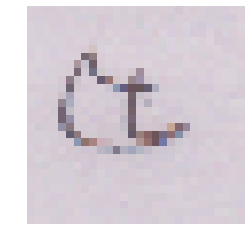

Label 5


In [4]:
vis_image(0,X/255.0,Y)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.2, random_state=42)

In [7]:
X_train = X_train/255.0
X_test = X_test/255.0

In [8]:
flat_X_train = np.reshape(X_train,newshape=(X_train.shape[0],-1)) 
flat_X_test = np.reshape(X_test,newshape=(X_test.shape[0],-1)) 

In [9]:
from sklearn import svm, metrics
param_C = 5
param_gamma = 0.05
classifier = svm.SVC(C=param_C,gamma=param_gamma)

In [10]:
import datetime as dt
#We learn the digits on train part
start_time = dt.datetime.now()
print('Training started at {}'.format(str(start_time)))
classifier.fit(flat_X_train, y_train)
end_time = dt.datetime.now() 
print('Training ended at {}'.format(str(end_time)))
elapsed_time= end_time - start_time
print('Elapsed time {}'.format(str(elapsed_time)))

Training started at 2019-03-25 15:12:13.726390
Training ended at 2019-03-25 15:46:03.701192
Elapsed time 0:33:49.974802


In [11]:
# Now predict the value of the test
expected = y_test
predicted = classifier.predict(flat_X_test)

In [12]:
print("Classification report for classifier %s:\n%s\n"
% (classifier, metrics.classification_report(expected, predicted)))

Classification report for classifier SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.71      0.54      0.62       470
           1       0.56      0.51      0.53       454
           2       0.74      0.56      0.63       412
           3       0.24      0.83      0.37       415
           4       0.76      0.52      0.61       447
           5       0.74      0.51      0.61       481
           6       0.74      0.47      0.58       466
           7       0.74      0.63      0.68       454
           8       0.85      0.60      0.70       458
           9       0.61      0.43      0.50       415

   micro avg       0.56      0.56      0.56      4472
   macro avg       0.67      0.56      0.58      4472
weighted avg       0.67      0.56    

In [13]:
from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix(expected, predicted)
print("Confusion matrix:\n%s" % cm)

print("Accuracy={}".format(metrics.accuracy_score(expected, predicted)))

Confusion matrix:
[[256  24   8 136   2   8   6  12   4  14]
 [ 21 231  19 120   4   3   6   6   3  41]
 [  6  38 229 103   9   4   3   5   4  11]
 [ 14   3   9 343   4   8  19   6   1   8]
 [ 10   7  10 130 231  15   5  18   7  14]
 [ 26   9   4 132  24 247  12  15   7   5]
 [  5  12   8 162   4  24 219  19   3  10]
 [  2   6   3 117   6  11   7 285  10   7]
 [ 10  14   8 108  14   4   8  11 276   5]
 [ 11  67  13 104   7   9   9   8  10 177]]
Accuracy=0.5576923076923077


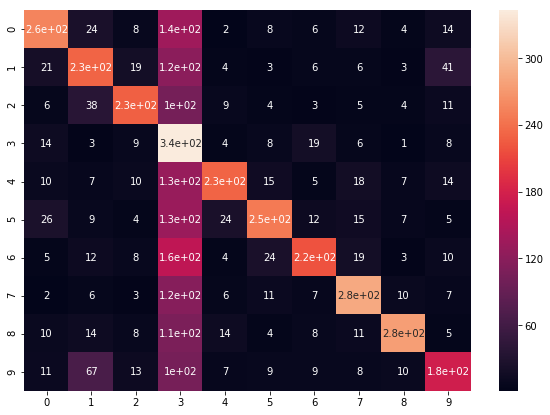

In [14]:
import seaborn as sn
import pandas as pd

df_cm = pd.DataFrame(cm.tolist(), index = [i for i in range(10)],
                  columns = [i for i in range(10)])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

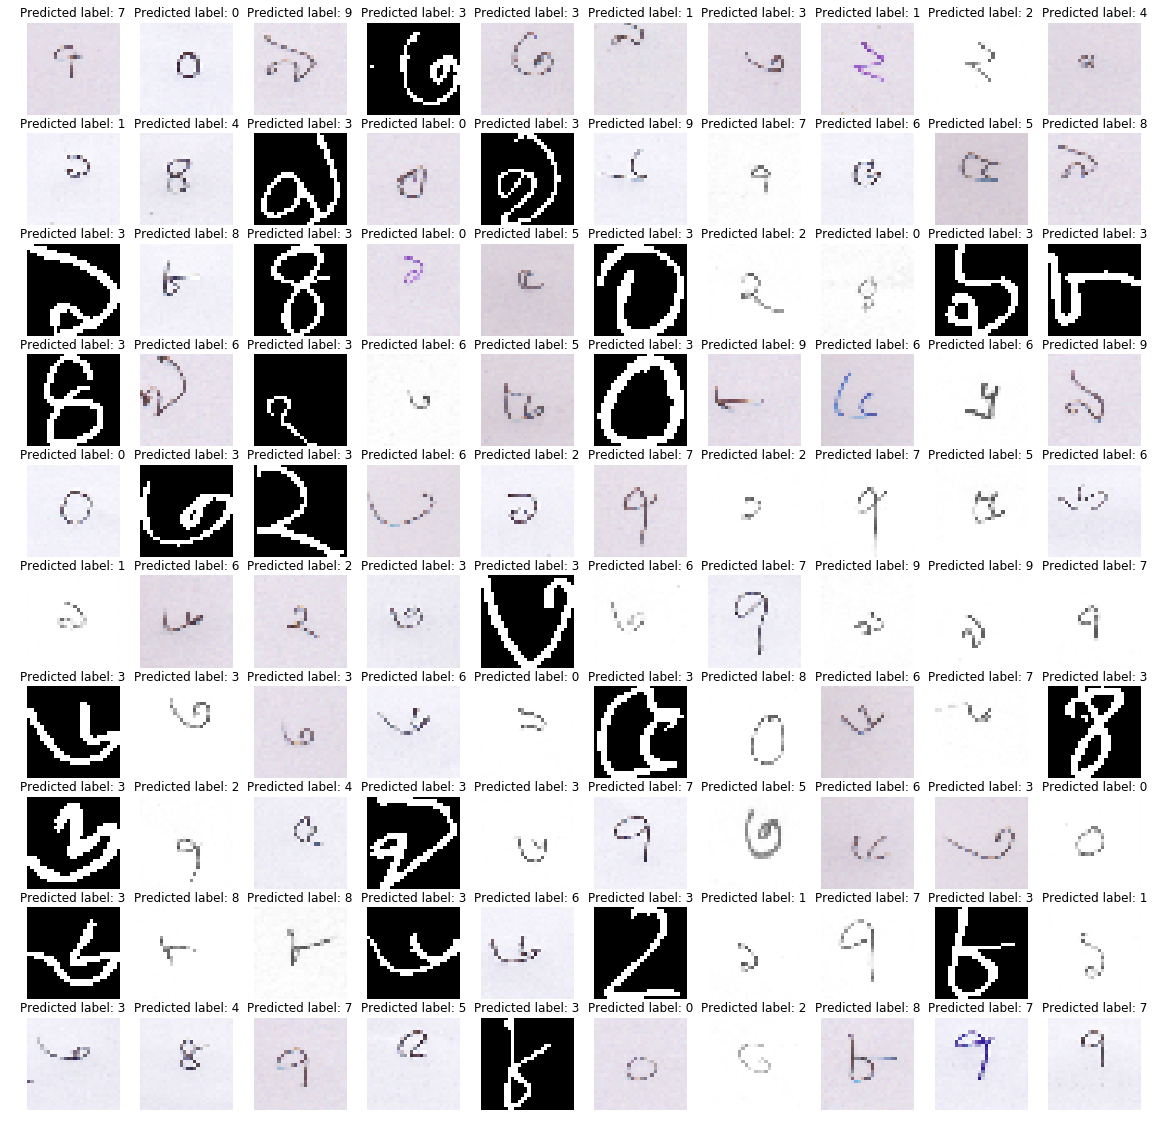

In [17]:
image_per_row = 10
image_per_col = 10
N = image_per_row * image_per_col
random_index = np.random.randint(0, X_test.shape[0], (N))
fig = plt.figure(figsize=(2 * image_per_col, 2 * image_per_row))
for i in range(N):
    idx = random_index[i]
    plt.subplot(image_per_row, image_per_col, i + 1)
    plt.axis('off')
    plt.imshow(X_test[idx])
    plt.title('Predicted label: ' + str(predicted[idx]))
plt.show()